In [1]:
import polars as pl
df = pl.read_csv(r"C:\Users\danie\Downloads\2022_Yellow_Taxi_Trip_Data_20250414.csv")


In [2]:
print(df.head())


shape: (5, 19)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ VendorID ┆ tpep_pick ┆ tpep_drop ┆ passenger ┆ … ┆ improveme ┆ total_amo ┆ congestio ┆ airport_f │
│ ---      ┆ up_dateti ┆ off_datet ┆ _count    ┆   ┆ nt_surcha ┆ unt       ┆ n_surchar ┆ ee        │
│ i64      ┆ me        ┆ ime       ┆ ---       ┆   ┆ rge       ┆ ---       ┆ ge        ┆ ---       │
│          ┆ ---       ┆ ---       ┆ i64       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ f64       │
│          ┆ str       ┆ str       ┆           ┆   ┆ f64       ┆           ┆ f64       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1        ┆ 01/01/202 ┆ 01/01/202 ┆ 2         ┆ … ┆ 0.3       ┆ 21.95     ┆ 2.5       ┆ 0.0       │
│          ┆ 2         ┆ 2         ┆           ┆   ┆           ┆           ┆           ┆           │
│          ┆ 12:35:40  ┆ 12:53:29  ┆           ┆   ┆           ┆           ┆

In [3]:
print(df.dtypes)

[Int64, String, String, Int64, Float64, Int64, String, Int64, Int64, Int64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64]


In [4]:
# check how many values are missing in each column
print(df.null_count())

shape: (1, 19)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ VendorID ┆ tpep_pick ┆ tpep_drop ┆ passenger ┆ … ┆ improveme ┆ total_amo ┆ congestio ┆ airport_f │
│ ---      ┆ up_dateti ┆ off_datet ┆ _count    ┆   ┆ nt_surcha ┆ unt       ┆ n_surchar ┆ ee        │
│ u32      ┆ me        ┆ ime       ┆ ---       ┆   ┆ rge       ┆ ---       ┆ ge        ┆ ---       │
│          ┆ ---       ┆ ---       ┆ u32       ┆   ┆ ---       ┆ u32       ┆ ---       ┆ u32       │
│          ┆ u32       ┆ u32       ┆           ┆   ┆ u32       ┆           ┆ u32       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0        ┆ 0         ┆ 0         ┆ 1368303   ┆ … ┆ 0         ┆ 0         ┆ 1368303   ┆ 1368303   │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


In [5]:
# check percentage of missing values in each column
print(df.null_count() / len(df) * 100)

shape: (1, 19)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ VendorID ┆ tpep_pick ┆ tpep_drop ┆ passenger ┆ … ┆ improveme ┆ total_amo ┆ congestio ┆ airport_f │
│ ---      ┆ up_dateti ┆ off_datet ┆ _count    ┆   ┆ nt_surcha ┆ unt       ┆ n_surchar ┆ ee        │
│ f64      ┆ me        ┆ ime       ┆ ---       ┆   ┆ rge       ┆ ---       ┆ ge        ┆ ---       │
│          ┆ ---       ┆ ---       ┆ f64       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ f64       │
│          ┆ f64       ┆ f64       ┆           ┆   ┆ f64       ┆           ┆ f64       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0      ┆ 0.0       ┆ 0.0       ┆ 3.450423  ┆ … ┆ 0.0       ┆ 0.0       ┆ 3.450423  ┆ 3.450423  │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


In [6]:
# convert the pickup and dropoff datetime columns to datetime objects
df = df.with_columns(
    pl.col("tpep_pickup_datetime").str.strptime(
        pl.Datetime, 
        format="%m/%d/%Y %I:%M:%S %p"  # <-- This matches your AM/PM format
    ),
    pl.col("tpep_dropoff_datetime").str.strptime(
        pl.Datetime, 
        format="%m/%d/%Y %I:%M:%S %p"  # Same format
    )
)
#df.dtypes

In [7]:
df_cleaned = df.clone()
print(df.dtypes)

[Int64, Datetime(time_unit='us', time_zone=None), Datetime(time_unit='us', time_zone=None), Int64, Float64, Int64, String, Int64, Int64, Int64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64]


In [8]:
df_cleaned = df_cleaned.select(
    pl.exclude(['improvement_surcharge', 'store_and_fwd_flag'])
)

In [9]:
# how many rows are there in the sampled dataframe
print(len(df_cleaned))

39656098


In [10]:
missing_cols = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'airport_fee']

# Create a boolean mask for rows where ALL 4 columns are NaN
all_missing_mask = df_cleaned.select(
    pl.all_horizontal(pl.col(missing_cols).is_null())
)

# Count how many rows this applies to
num_all_missing = all_missing_mask.sum()

print(f"Rows with all 4 values missing: {num_all_missing}")

Rows with all 4 values missing: shape: (1, 1)
┌─────────────────┐
│ passenger_count │
│ ---             │
│ u32             │
╞═════════════════╡
│ 1368303         │
└─────────────────┘


In [11]:
# Remove rows where ALL 4 columns are NaN
df_cleaned = df_cleaned.filter(
    ~pl.all_horizontal(pl.col(missing_cols).is_null())
)

In [12]:
# get database statistics
df_cleaned.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",3.8287795e7,"""38287795""","""38287795""",3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7,3.8287795e7
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.713156,"""2022-07-05 00:02:30.606804""","""2022-07-05 00:57:11.752205""",1.401149,3.514399,1.424172,164.929276,162.856345,1.232061,14.627631,1.040985,0.488537,2.7139,0.531059,21.423733,2.281437,0.097419
"""std""",0.452288,null,null,0.962894,56.432458,5.794343,64.94462,70.157077,0.476083,97.43135,1.271069,0.095085,3.288837,2.031171,98.01355,0.751943,0.338539
"""min""",1.0,"""2001-01-01 00:03:14""","""2001-01-01 00:34:17""",0.0,0.0,1.0,1.0,1.0,1.0,-2564.0,-22.18,-0.55,-410.0,-99.99,-2567.8,-2.5,-1.25
"""25%""",1.0,"""2022-04-07 19:04:37""","""2022-04-07 19:21:25""",1.0,1.1,1.0,132.0,113.0,1.0,7.0,0.0,0.5,0.7,0.0,12.3,2.5,0.0
"""50%""",2.0,"""2022-06-30 23:33:04""","""2022-06-30 23:50:20""",1.0,1.86,1.0,162.0,162.0,1.0,10.0,0.5,0.5,2.15,0.0,15.95,2.5,0.0
"""75%""",2.0,"""2022-10-04 17:04:53""","""2022-10-04 17:23:22""",1.0,3.49,1.0,234.0,234.0,1.0,16.0,2.5,0.5,3.35,0.0,22.77,2.5,0.0
"""max""",2.0,"""2023-04-18 14:30:05""","""2023-04-18 23:30:39""",9.0,184340.8,99.0,265.0,265.0,5.0,401092.32,33.5,25.48,1400.16,911.87,401095.62,2.75,1.25


In [13]:
# print rows where trip distance is greater than 100 miles
# and sort them in descending order, and decending by total_amount
# Set display options before printing
pl.Config.set_tbl_formatting("UTF8_FULL")  # For better border characters
pl.Config.set_tbl_width_chars(300)         # Total display width in characters
pl.Config.set_tbl_cols(50)                # Max columns to display (-1 for all)
pl.Config.set_tbl_rows(20)                # Max rows to display (-1 for all)
pl.Config.set_fmt_str_lengths(50)         # Max string length to display

result = (
    df_cleaned.lazy()
    .filter(pl.col("trip_distance") > 100)
    .sort("trip_distance", descending=True)
    .head(10)
    .collect()
)

print(result)

shape: (10, 17)
┌──────────┬──────────────────────┬───────────────────────┬─────────────────┬───────────────┬────────────┬──────────────┬──────────────┬──────────────┬─────────────┬───────┬─────────┬────────────┬──────────────┬──────────────┬──────────────────────┬─────────────┐
│ VendorID ┆ tpep_pickup_datetime ┆ tpep_dropoff_datetime ┆ passenger_count ┆ trip_distance ┆ RatecodeID ┆ PULocationID ┆ DOLocationID ┆ payment_type ┆ fare_amount ┆ extra ┆ mta_tax ┆ tip_amount ┆ tolls_amount ┆ total_amount ┆ congestion_surcharge ┆ airport_fee │
│ ---      ┆ ---                  ┆ ---                   ┆ ---             ┆ ---           ┆ ---        ┆ ---          ┆ ---          ┆ ---          ┆ ---         ┆ ---   ┆ ---     ┆ ---        ┆ ---          ┆ ---          ┆ ---                  ┆ ---         │
│ i64      ┆ datetime[μs]         ┆ datetime[μs]          ┆ i64             ┆ f64           ┆ i64        ┆ i64          ┆ i64          ┆ i64          ┆ f64         ┆ f64   ┆ f64     ┆ f64     

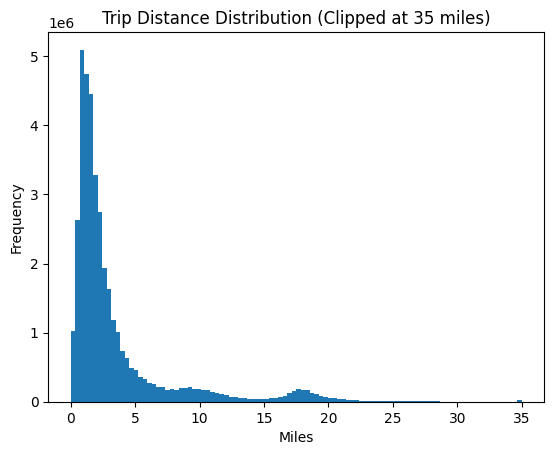

In [14]:
import matplotlib.pyplot as plt

clipped_data = (
    df_cleaned.select(
        pl.when(pl.col("trip_distance") > 35)
        .then(35)
        .otherwise(pl.col("trip_distance"))
        .alias("clipped_distance")
    )
    .to_series()
    .to_numpy()
)

# Generate histogram
plt.hist(clipped_data, bins=100)
plt.title("Trip Distance Distribution (Clipped at 35 miles)")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()


In [15]:
# check how many entries are from different years in 'tpep_pickup_datetime' column
print(
    df_cleaned.select(
        pl.col("tpep_pickup_datetime").dt.year().value_counts(sort=True)
    )
)

shape: (9, 1)
┌──────────────────────┐
│ tpep_pickup_datetime │
│ ---                  │
│ struct[2]            │
╞══════════════════════╡
│ {2022,38287234}      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2002,441}           │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2009,40}            │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2008,34}            │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2021,24}            │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2003,9}             │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2001,6}             │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2023,6}             │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ {2012,1}             │
└──────────────────────┘


In [16]:
# only keep the rows from 2022
df_cleaned = df_cleaned.filter(
    pl.col("tpep_pickup_datetime").dt.year() == 2022
)

In [17]:
# make a copy of the dataframe but limit trip distance to 35 miles
df_cleaned_35 = df_cleaned.clone()
# remove rows where trip distance is greater than 35 miles
df_cleaned_35 = df_cleaned_35.filter(pl.col("trip_distance") <= 35)
print(df_cleaned_35)

shape: (38_266_386, 17)
┌──────────┬──────────────────────┬───────────────────────┬─────────────────┬───────────────┬────────────┬──────────────┬──────────────┬──────────────┬─────────────┬───────┬─────────┬────────────┬──────────────┬──────────────┬──────────────────────┬─────────────┐
│ VendorID ┆ tpep_pickup_datetime ┆ tpep_dropoff_datetime ┆ passenger_count ┆ trip_distance ┆ RatecodeID ┆ PULocationID ┆ DOLocationID ┆ payment_type ┆ fare_amount ┆ extra ┆ mta_tax ┆ tip_amount ┆ tolls_amount ┆ total_amount ┆ congestion_surcharge ┆ airport_fee │
│ ---      ┆ ---                  ┆ ---                   ┆ ---             ┆ ---           ┆ ---        ┆ ---          ┆ ---          ┆ ---          ┆ ---         ┆ ---   ┆ ---     ┆ ---        ┆ ---          ┆ ---          ┆ ---                  ┆ ---         │
│ i64      ┆ datetime[μs]         ┆ datetime[μs]          ┆ i64             ┆ f64           ┆ i64        ┆ i64          ┆ i64          ┆ i64          ┆ f64         ┆ f64   ┆ f64     ┆ 

In [18]:
# what is the percentage of data in df_cleaned_35 compared to df_cleaned?
percentage = (len(df_cleaned_35) / len(df_cleaned)) * 100
print(f"Percentage of data in df_cleaned_35 compared to df_cleaned: {percentage:.2f}%")

Percentage of data in df_cleaned_35 compared to df_cleaned: 99.95%


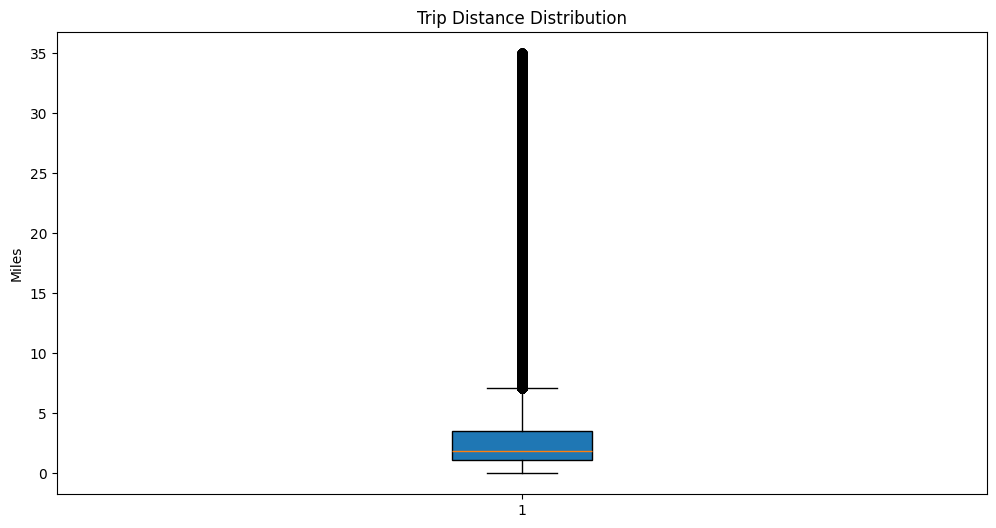

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy array (most efficient for large datasets)
# 1. Extract data
trip_dist = df_cleaned_35.select("trip_distance").to_series().to_numpy()

# 2. Create plot
plt.figure(figsize=(12, 6))
plt.boxplot(trip_dist, patch_artist=True)

# 3. Customize grid (AFTER creating the plot)
plt.grid(False)  # This is where you disable the grid

# 4. Add labels and title
plt.title("Trip Distance Distribution")
plt.ylabel("Miles")
plt.show()

In [20]:
# what is the max fare amount?
print(df_cleaned_35["total_amount"].max())

401095.62


In [21]:
# remove rows where total amount is greater than 100 or less than 0
df_cleaned_35 = df_cleaned_35.filter(
    (pl.col("total_amount") <= 100) & 
    (pl.col("total_amount") >= 0)
)

C:\Users\danie\AppData\Local\Temp\ipykernel_17700\1139418761.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


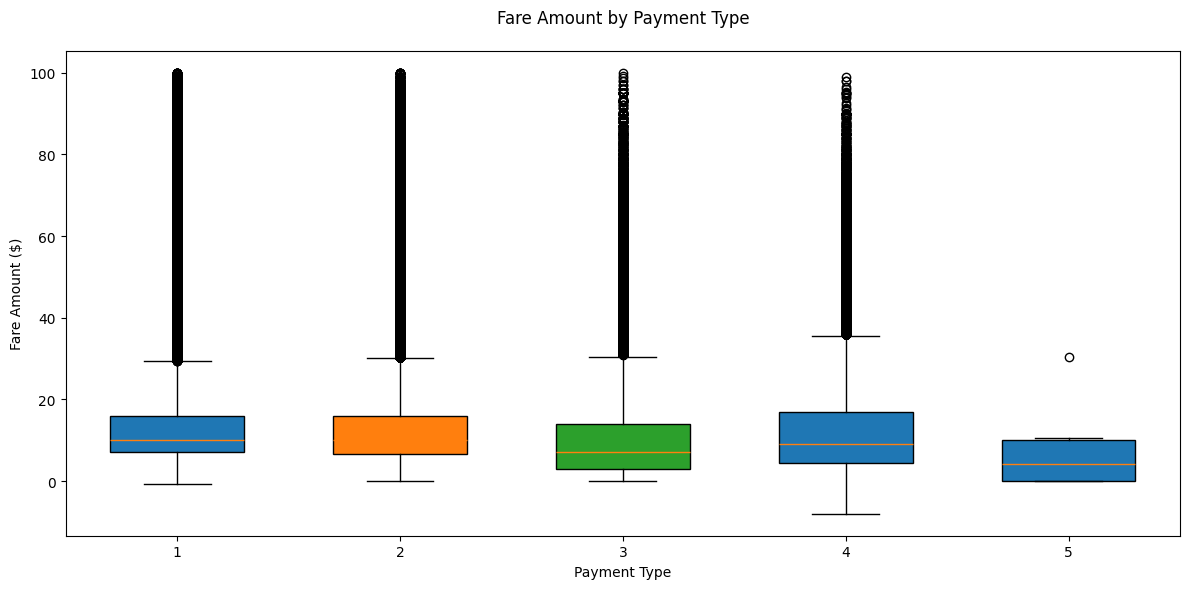

In [22]:
# create box and whisker plot for the fare amount
# 1. Get unique payment types
payment_types = (
    df_cleaned_35.select("payment_type")
    .unique()
    .sort("payment_type")
    .to_series()
    .to_list()
)

# 2. Prepare data for each group
data = [
    df_cleaned_35.filter(pl.col("payment_type") == pt)
    .select("fare_amount")
    .to_series()
    .to_numpy()
    for pt in payment_types
]

# 3. Create the boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(
    data,
    labels=payment_types,
    patch_artist=True,  # Enable coloring
    showfliers=True,    # Show outliers
    widths=0.6         # Box width
)

# 4. Customize colors and style
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom color palette
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 5. Format the plot
plt.title("Fare Amount by Payment Type", pad=20)
plt.xlabel("Payment Type")
plt.ylabel("Fare Amount ($)")
plt.grid(False)
plt.tight_layout()
plt.show()

In [23]:
# 2. Calculate trip duration in minutes
df_cleaned_35 = df_cleaned_35.with_columns(
    (
        (pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime")).dt.total_seconds() / 60.0
    ).alias("trip_duration")
)

# 3. Calculate average speed in mph (with zero-division protection)
df_cleaned_35 = df_cleaned_35.with_columns(
    pl.when(pl.col("trip_duration") > 0)
     .then(pl.col("trip_distance") / (pl.col("trip_duration") / 60))
     .otherwise(None)
     .alias("average_speed")
)
print(df_cleaned_35.describe())

shape: (9, 20)
┌────────────┬─────────────┬────────────────┬───────────────┬───────────────┬───────────────┬─────────────┬──────────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬──────────────┬──────────────┬───────────────┬─────────────┬───────────────┬───────────────┐
│ statistic  ┆ VendorID    ┆ tpep_pickup_da ┆ tpep_dropoff_ ┆ passenger_cou ┆ trip_distance ┆ RatecodeID  ┆ PULocationID ┆ DOLocationID ┆ payment_type ┆ fare_amount ┆ extra       ┆ mta_tax     ┆ tip_amount  ┆ tolls_amount ┆ total_amount ┆ congestion_su ┆ airport_fee ┆ trip_duration ┆ average_speed │
│ ---        ┆ ---         ┆ tetime         ┆ datetime      ┆ nt            ┆ ---           ┆ ---         ┆ ---          ┆ ---          ┆ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---          ┆ ---          ┆ rcharge       ┆ ---         ┆ ---           ┆ ---           │
│ str        ┆ f64         ┆ ---            ┆ ---           ┆ ---           ┆ f64 

In [24]:
import pandas as pd
# import taxi_zone_lookup.csv file
zone_lookup = pl.read_csv(r"C:\Users\danie\OneDrive\Desktop\DTSC_Taxi_Project\taxi_zone_lookup.csv")
# check the first 5 rows of the dataframe
print(zone_lookup.head())

shape: (5, 4)
┌────────────┬───────────────┬─────────────────────────┬──────────────┐
│ LocationID ┆ Borough       ┆ Zone                    ┆ service_zone │
│ ---        ┆ ---           ┆ ---                     ┆ ---          │
│ i64        ┆ str           ┆ str                     ┆ str          │
╞════════════╪═══════════════╪═════════════════════════╪══════════════╡
│ 1          ┆ EWR           ┆ Newark Airport          ┆ EWR          │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 2          ┆ Queens        ┆ Jamaica Bay             ┆ Boro Zone    │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 3          ┆ Bronx         ┆ Allerton/Pelham Gardens ┆ Boro Zone    │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 4          ┆ Manhattan     ┆ Alphabet City           ┆ Yellow Zone  │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 5          ┆ Staten Island ┆ Arden Heights      

In [25]:
# Merging
# Rename Zone column so it's clear after merge
zone_lookup_pickup = zone_lookup.rename({
    "LocationID": "PULocationID",
    "Zone": "pickup_zone"
})

zone_lookup_dropoff = zone_lookup.rename({
    "LocationID": "DOLocationID",
    "Zone": "dropoff_zone"
})

df_cleaned_35 = df_cleaned_35.join(
    zone_lookup_pickup[["PULocationID", "pickup_zone"]],
    on="PULocationID",
    how="left"
)

df_cleaned_35 = df_cleaned_35.join(
    zone_lookup_dropoff[["DOLocationID", "dropoff_zone"]],
    on="DOLocationID",
    how="left"
)

In [26]:
df_cleaned_35.head(10)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,trip_duration,average_speed,pickup_zone,dropoff_zone
i64,datetime[μs],datetime[μs],i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.8,1,142,236,1,14.5,3.0,0.5,3.65,0.0,21.95,2.5,0.0,17.816667,12.797007,"""Lincoln Square East""","""Upper East Side North"""
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.1,1,236,42,1,8.0,0.5,0.5,4.0,0.0,13.3,0.0,0.0,8.4,15.0,"""Upper East Side North""","""Central Harlem North"""
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,166,166,1,7.5,0.5,0.5,1.76,0.0,10.56,0.0,0.0,8.966667,6.490706,"""Morningside Heights""","""Morningside Heights"""
2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,114,68,2,8.0,0.5,0.5,0.0,0.0,11.8,2.5,0.0,10.033333,6.518272,"""Greenwich Village South""","""East Chelsea"""
2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.3,1,68,163,1,23.5,0.5,0.5,3.0,0.0,30.3,2.5,0.0,37.533333,6.87389,"""East Chelsea""","""Midtown North"""
1,2022-01-01 00:40:15,2022-01-01 01:09:48,1,10.3,1,138,161,1,33.0,3.0,0.5,13.0,6.55,56.35,2.5,0.0,29.55,20.913706,"""LaGuardia Airport""","""Midtown Center"""
2,2022-01-01 00:20:50,2022-01-01 00:34:58,1,5.07,1,233,87,1,17.0,0.5,0.5,5.2,0.0,26.0,2.5,0.0,14.133333,21.523585,"""UN/Turtle Bay South""","""Financial District North"""
2,2022-01-01 00:13:04,2022-01-01 00:22:45,1,2.02,1,238,152,2,9.0,0.5,0.5,0.0,0.0,12.8,2.5,0.0,9.683333,12.516351,"""Upper West Side North""","""Manhattanville"""
2,2022-01-01 00:30:02,2022-01-01 00:44:49,1,2.71,1,166,236,1,12.0,0.5,0.5,2.25,0.0,18.05,2.5,0.0,14.783333,10.998873,"""Morningside Heights""","""Upper East Side North"""


In [27]:
# print number of rows where average speed is greater than 80 mph
print(
    len(df_cleaned_35.filter(pl.col("average_speed") > 80))
)

31858


In [28]:
# sort the dataframe by average speed in descending order
#df_cleaned_35[df_cleaned_35["average_speed"] > 80].sort_values("average_speed", ascending=False).head(10)
# as we can see there is an issue with some pickup and dropoff times
# we will drop the rows where average speed is greater than 80 mph
df_cleaned_35 = df_cleaned_35.filter(pl.col("average_speed") <= 80)

In [29]:
# how much percentage wise of data left compared to the original dataframe
percentage = (len(df_cleaned_35) / len(df)) * 100
print(f"Percentage of data in df_cleaned_35 compared to df_cleaned: {percentage:.2f}%")

Percentage of data in df_cleaned_35 compared to df_cleaned: 95.42%


In [30]:
# if pickup and dropoff zones  are equal to 'NaN' replace with 'Outside NYC'
df_cleaned_35 = df_cleaned_35.with_columns(
    pl.col("pickup_zone").fill_null("Outside NYC"),
    pl.col("dropoff_zone").fill_null("Outside NYC")
)
# check unique values in pickup and dropoff zones

In [31]:
# check unique values in pickup and dropoff zones
print(len(df_cleaned_35['pickup_zone'].unique()))
print(len(df_cleaned_35['dropoff_zone'].unique()))

261
261


In [32]:
# drop any rows where pickup and dropoff zones are equal 'Outside NYC'
df_cleaned_35 = df_cleaned_35.filter(
    ~(
        (pl.col("pickup_zone") == "Outside NYC") & 
        (pl.col("dropoff_zone") == "Outside NYC")
    )
)

In [33]:
# how many different combinations of pickup and dropoff zones are there?
unique_combinations = df_cleaned_35.select(["pickup_zone", "dropoff_zone"]).unique()
print(unique_combinations.height)

42042


In [37]:
# Extract hour of day and day of week from pickup timestamp
df_cleaned_35 = df_cleaned_35.with_columns(
    pl.col("tpep_pickup_datetime")
    .dt.strftime("%H:%M")  # Format to hour:minute only
    .alias("pick_up_time"),
    
    (pl.col("tpep_pickup_datetime").dt.weekday() + 1).alias("day_of_week")  # Monday=1
)

# Get unique values in the 'hour_of_day' column
unique_hours = df_cleaned_35.select(pl.col("pick_up_time").unique())

# Show the unique hours
print(unique_hours.count())
#print("\n",df_cleaned_35.select("day_of_week").unique())

shape: (1, 1)
┌──────────────┐
│ pick_up_time │
│ ---          │
│ u32          │
╞══════════════╡
│ 1440         │
└──────────────┘


In [35]:
# Define peak hours (8AM to 7PM)
peak_hours = range(8, 19)

# Create is_rush_hour column using vectorized operations
df_cleaned_35 = df_cleaned_35.with_columns(
    pl.when(
        (pl.col("pick_up_time").str.slice(0, 2).cast(pl.Int64()).is_in(peak_hours)) & 
        (pl.col("average_speed") <= 12)
    ).then(1).otherwise(0).alias("is_rush_hour")
)


In [39]:
# only leave columns in df_cleaned_35 where trip_duration is greater or equal to 1 and less than or equal to 90
df_cleaned_35 = df_cleaned_35.filter(
    (pl.col("trip_duration") >= 1) & 
    (pl.col("trip_duration") <= 90)
)

In [40]:
percentage = (len(df_cleaned_35) / len(df)) * 100
print(f"Percentage of data in df_cleaned_35 compared to df_cleaned: {percentage:.2f}%")

Percentage of data in df_cleaned_35 compared to df_cleaned: 94.22%


In [41]:
# Make a copy to preserve original
df_model_ready = df_cleaned_35.clone()

#Ready for ML
df_model_ready = df_model_ready.select([
    "pickup_zone", "dropoff_zone",
    "pick_up_time", "day_of_week",
    "passenger_count", "trip_distance",
    "RatecodeID", "congestion_surcharge",
    "average_speed", "is_rush_hour",
    "trip_duration", "total_amount"
])
print(df_model_ready)

shape: (37_363_986, 12)
┌───────────────────────────────┬──────────────────────────┬──────────────┬─────────────┬─────────────────┬───────────────┬────────────┬──────────────────────┬───────────────┬──────────────┬───────────────┬──────────────┐
│ pickup_zone                   ┆ dropoff_zone             ┆ pick_up_time ┆ day_of_week ┆ passenger_count ┆ trip_distance ┆ RatecodeID ┆ congestion_surcharge ┆ average_speed ┆ is_rush_hour ┆ trip_duration ┆ total_amount │
│ ---                           ┆ ---                      ┆ ---          ┆ ---         ┆ ---             ┆ ---           ┆ ---        ┆ ---                  ┆ ---           ┆ ---          ┆ ---           ┆ ---          │
│ str                           ┆ str                      ┆ str          ┆ i8          ┆ i64             ┆ f64           ┆ i64        ┆ f64                  ┆ f64           ┆ i32          ┆ f64           ┆ f64          │
╞═══════════════════════════════╪══════════════════════════╪══════════════╪═════════════

In [42]:
from sklearn.preprocessing import LabelEncoder

# Convert to categorical in Polars first (more memory efficient)
df_cleaned_35 = df_cleaned_35.with_columns(
    pl.col("pickup_zone").cast(pl.Categorical),
    pl.col("dropoff_zone").cast(pl.Categorical),
    pl.col("pick_up_time").cast(pl.Categorical)
)

# Now sample before converting to Pandas
df_sample = df_cleaned_35.sample(n=500_000, seed=42)

# Convert just the sample to Pandas
df_sample_filtered = df_sample.to_pandas()

# Apply LabelEncoder
le_pickup = LabelEncoder()
le_dropoff = LabelEncoder()
le_time = LabelEncoder()

df_sample_filtered["pickup_zone_enc"] = le_pickup.fit_transform(df_sample_filtered["pickup_zone"])
df_sample_filtered["dropoff_zone_enc"] = le_dropoff.fit_transform(df_sample_filtered["dropoff_zone"])
df_sample_filtered["pick_up_time"] = le_time.fit_transform(df_sample_filtered["pick_up_time"])

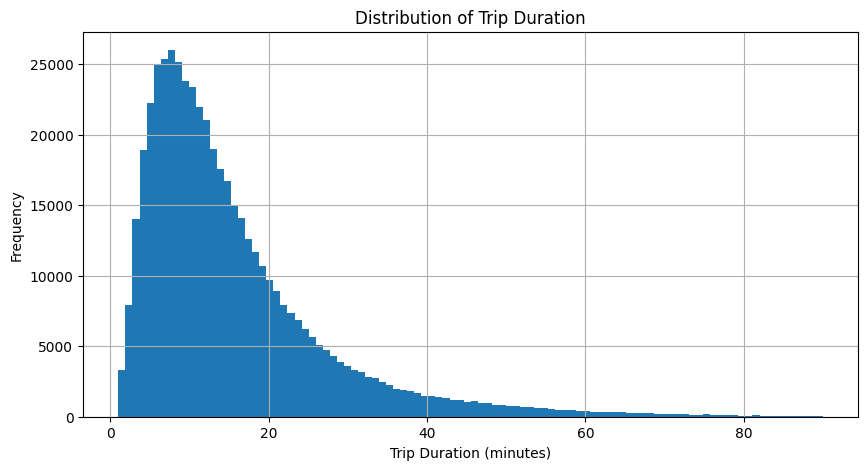

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df_sample_filtered["trip_duration"].hist(bins=100)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Duration")
plt.grid(True)
plt.show()

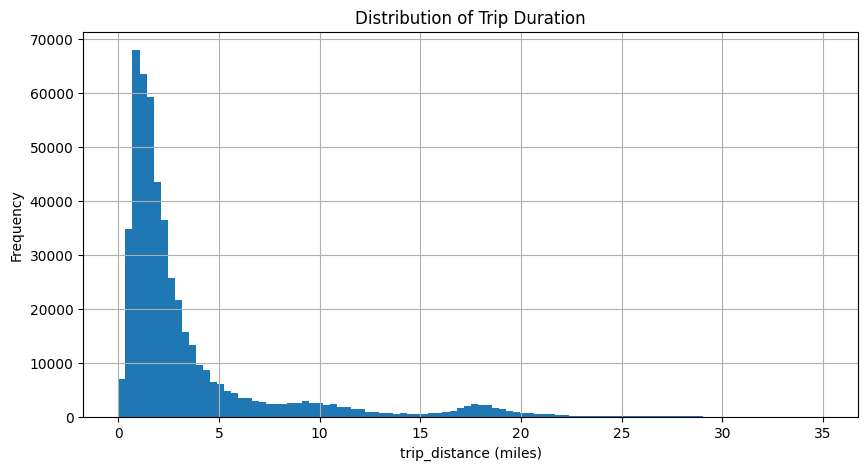

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df_sample_filtered["trip_distance"].hist(bins=100)
plt.xlabel("trip_distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Duration")
plt.grid(True)
plt.show()

## Chain model

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import r2_score, root_mean_squared_error
df_sample_filtered["pickup_zone_enc"] = le_pickup.transform(df_sample_filtered["pickup_zone"])
df_sample_filtered["dropoff_zone_enc"] = le_dropoff.transform(df_sample_filtered["dropoff_zone"])

# Define base features
base_features = [
    "pickup_zone_enc", "dropoff_zone_enc",
    "RatecodeID", "pick_up_time", "day_of_week", "is_rush_hour"
]

In [ ]:
# === 3. Train Distance Model ===
distance_features = base_features
X_dist = df_sample_filtered[distance_features]
y_dist = df_sample_filtered["trip_distance"]

X_train_dist, X_test_dist, y_train_dist, y_test_dist = train_test_split(X_dist, y_dist, test_size=0.2, random_state=42)

distance_model = RandomForestRegressor(n_estimators=0, max_depth=15, random_state=42, min_samples_leaf=5, n_jobs=-1)
distance_model.fit(X_train_dist, y_train_dist)

y_train_pred_dist = distance_model.predict(X_train_dist)  # Added training predictions
y_pred_dist = distance_model.predict(X_test_dist)

print("Train RMSE:", root_mean_squared_error(y_train_dist, y_train_pred_dist))
print("Test RMSE:", root_mean_squared_error(y_test_dist, y_pred_dist))
print("\nTrain R2:", r2_score(y_train_dist, y_train_pred_dist))
print("Test R2:", r2_score(y_test_dist, y_pred_dist))

# Predict distances for all rows
df_sample_filtered["predicted_distance"] = distance_model.predict(X_dist)

Train RMSE: 1.365092679941285
Test RMSE: 1.4553728548904699

Train R2: 0.8965595950277168
Test R2: 0.8820151278315765


[0]	validation_0-rmse:11.50225
[10]	validation_0-rmse:7.82756
[20]	validation_0-rmse:6.72393
[30]	validation_0-rmse:6.41952
[40]	validation_0-rmse:6.28951
[50]	validation_0-rmse:6.20970
[60]	validation_0-rmse:6.15618
[70]	validation_0-rmse:6.09752
[80]	validation_0-rmse:6.04395
[90]	validation_0-rmse:6.01774
[100]	validation_0-rmse:5.98139
[110]	validation_0-rmse:5.95705
[120]	validation_0-rmse:5.93061
[130]	validation_0-rmse:5.91280
[140]	validation_0-rmse:5.89708
[150]	validation_0-rmse:5.88072
[160]	validation_0-rmse:5.85530
[170]	validation_0-rmse:5.83943
[180]	validation_0-rmse:5.83134
[190]	validation_0-rmse:5.82207
[200]	validation_0-rmse:5.81031
[210]	validation_0-rmse:5.79724
[220]	validation_0-rmse:5.78649
[230]	validation_0-rmse:5.77739
[240]	validation_0-rmse:5.76681
[250]	validation_0-rmse:5.76090
[260]	validation_0-rmse:5.75407
[270]	validation_0-rmse:5.74804
[280]	validation_0-rmse:5.74276
[290]	validation_0-rmse:5.74048
[300]	validation_0-rmse:5.73285
[310]	validation_0

<Figure size 1000x600 with 0 Axes>

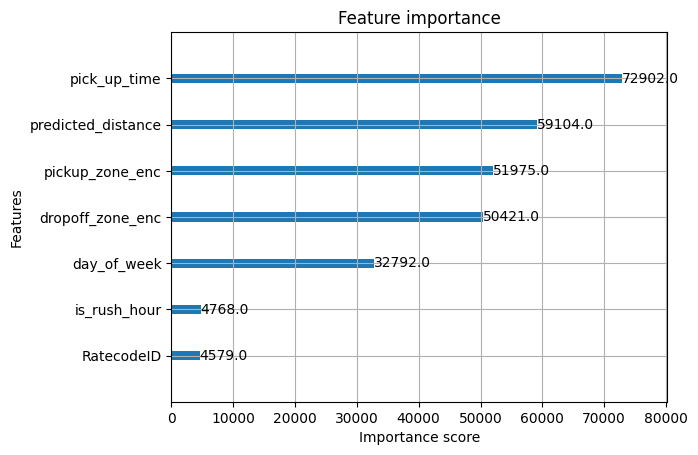

In [47]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# === 4. Train Duration Model with XGBoost ===
duration_features = base_features + ["predicted_distance"]
X_dur = df_sample_filtered[duration_features]
y_dur = df_sample_filtered["trip_duration"]  # Keep log-transform for skewed data

# Train-test split
X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(
    X_dur, y_dur, test_size=0.2, random_state=42
)

# Initialize XGBoost model with tuned parameters
duration_model = xgb.XGBRegressor(
    n_estimators=1500,        # More trees
    max_depth=10,              # Shallower, but better splitting
    learning_rate=0.1,       # Smaller steps
    subsample=0.9,
    gamma=0.01,                # Make splitting a little more cautious
    colsample_bytree=0.8,
    reg_alpha=1.0,
    min_child_weight=5,
    early_stopping_rounds=50,
    random_state=42,
    n_jobs=-1
)

# Train with early stopping
duration_model.fit(
    X_train_dur, 
    y_train_dur,
    eval_set=[(X_test_dur, y_test_dur)],
    verbose=10
)

# Make predictions (log space)
y_train_pred_dur = duration_model.predict(X_train_dur)
y_test_pred_dur = duration_model.predict(X_test_dur)

# Evaluation metrics
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("\n=== Evaluation Metrics ===")
print("Train RMSE:", root_mean_squared_error(y_train_dur, y_train_pred_dur))
print("Test RMSE:", root_mean_squared_error(y_test_dur, y_test_pred_dur))
print("\nTrain R2:", r2_score(y_train_dur, y_train_pred_dur))
print("Test R2:", r2_score(y_test_dur, y_test_pred_dur))

# Feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(duration_model, max_num_features=15)
plt.show()

# Predict for all data
df_sample_filtered["predicted_duration"] = (duration_model.predict(X_dur))

In [48]:
# === 5. Train Fare Model ===
fare_features = base_features + ["predicted_distance", "predicted_duration"]
X_fare = df_sample_filtered[fare_features]
y_fare = df_sample_filtered["total_amount"]

X_train_fare, X_test_fare, y_train_fare, y_test_fare = train_test_split(X_fare, y_fare, test_size=0.2, random_state=42)

fare_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, min_samples_leaf=8, n_jobs=-1)
fare_model.fit(X_train_fare, y_train_fare)

y_pred_fare_test = fare_model.predict(X_test_fare)
y_pred_fare_train = fare_model.predict(X_train_fare)

rmse_fare_test = np.sqrt(mean_squared_error(y_test_fare, y_pred_fare_test))
rmse_fare_train = np.sqrt(mean_squared_error(y_train_fare, y_pred_fare_train))

print(f"Test Fare Model RMSE: {rmse_fare_test:.2f} dollars")
print(f"Train Fare Model RMSE: {rmse_fare_train:.2f} dollars")
print("\nTrain R2:", r2_score(y_train_fare, y_pred_fare_train))
print("Test R2:", r2_score(y_test_fare, y_pred_fare_test))

Test Fare Model RMSE: 5.31 dollars
Train Fare Model RMSE: 4.16 dollars

Train R2: 0.9255686643834665
Test R2: 0.8769676244964294


In [49]:
# === 6. Save models and encoders ===
joblib.dump(distance_model, "trip_distance_model.pkl")
joblib.dump(duration_model, "trip_duration_model.pkl")
joblib.dump(fare_model, "trip_fare_model.pkl")
joblib.dump(le_pickup, "pickup_zone_encoder.pkl")
joblib.dump(le_dropoff, "dropoff_zone_encoder.pkl")

['dropoff_zone_encoder.pkl']

In [ ]:
code = '''
import joblib
import numpy as np
import streamlit as st

# Load models and encoders
model_durr = joblib.load("trip_duration_model.pkl")
model_dis = joblib.load("trip_distance_model.pkl")
model_fare = joblib.load("trip_fare_model.pkl")
le_pickup = joblib.load("pickup_zone_encoder.pkl")
le_dropoff = joblib.load("dropoff_zone_encoder.pkl")

# Extract the unique pickup and dropoff zones directly from the encoder's classes_
pickup_zones = le_pickup.classes_.tolist()  # Getting the unique zones from the pickup encoder
dropoff_zones = le_dropoff.classes_.tolist()  # Getting the unique zones from the dropoff encoder

# --- Sidebar Inputs ---
st.sidebar.header("Input Trip Details")
pickup_zone = st.sidebar.selectbox("Pickup Zone", pickup_zones)
dropoff_zone = st.sidebar.selectbox("Dropoff Zone", dropoff_zones)
pickup_time = st.sidebar.time_input("Pick-up Time", value="08:00")  # default value 08:00 AM
day_of_week = st.sidebar.selectbox("Day of the Week", options=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
passenger_count = st.sidebar.slider("Passenger Count", 1, 6, 1)

# Convert the day of the week to the appropriate numeric value
day_of_week_numeric = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"].index(day_of_week)

# --- Feature Engineering ---
pickup_enc = le_pickup.transform([pickup_zone])[0]
dropoff_enc = le_dropoff.transform([dropoff_zone])[0]
pickup_hour = pickup_time.hour
pickup_minute = pickup_time.minute

# Prepare input features for prediction
X_input = np.array([[pickup_enc, dropoff_enc, pickup_hour, pickup_minute, day_of_week_numeric, passenger_count]])

# --- Predictions ---
# Trip Duration Prediction
duration_pred = model_durr.predict(X_input)[0]

# Trip Distance Prediction
distance_pred = model_dis.predict(X_input)[0]

# Trip Fare Prediction
fare_pred = model_fare.predict(X_input)[0]

# --- Display Results ---
st.subheader("Trip Predictions")
st.write(f"🚕 **Predicted Duration**: {duration_pred:.2f} minutes")
st.write(f"📏 **Predicted Distance**: {distance_pred:.2f} miles")
st.write(f"💵 **Predicted Fare**: ${fare_pred:.2f}")
'''

with open("taxi_project_dashboard.py", "w", encoding="utf-8") as f:
    f.write(code)
